In [ ]:
## dr.no – the crime no, date and time occ - date and time of occurrence, area no and area name, reporting district no , crime code, crime description, status, status description, location , street and location1 – which is the latitude and longitude details.

In [ ]:
import pandas as pd
import numpy as np

# Importing Dataset

In [ ]:
df=pd.read_csv("D:\DEV\DataSets\Crime_Data_from_2020_to_Present.csv")

# Reading the dataset

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984045 entries, 0 to 984044
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           984045 non-null  int64  
 1   Date Rptd       984045 non-null  object 
 2   DATE OCC        984045 non-null  object 
 3   TIME OCC        984045 non-null  int64  
 4   AREA            984045 non-null  int64  
 5   AREA NAME       984045 non-null  object 
 6   Rpt Dist No     984045 non-null  int64  
 7   Part 1-2        984045 non-null  int64  
 8   Crm Cd          984045 non-null  int64  
 9   Crm Cd Desc     984045 non-null  object 
 10  Mocodes         837566 non-null  object 
 11  Vict Age        984045 non-null  int64  
 12  Vict Sex        844481 non-null  object 
 13  Vict Descent    844471 non-null  object 
 14  Premis Cd       984031 non-null  float64
 15  Premis Desc     983489 non-null  object 
 16  Weapon Used Cd  324280 non-null  float64
 17  Weapon Des

In [ ]:
df.drop_duplicates(inplace=True)

# Visualization

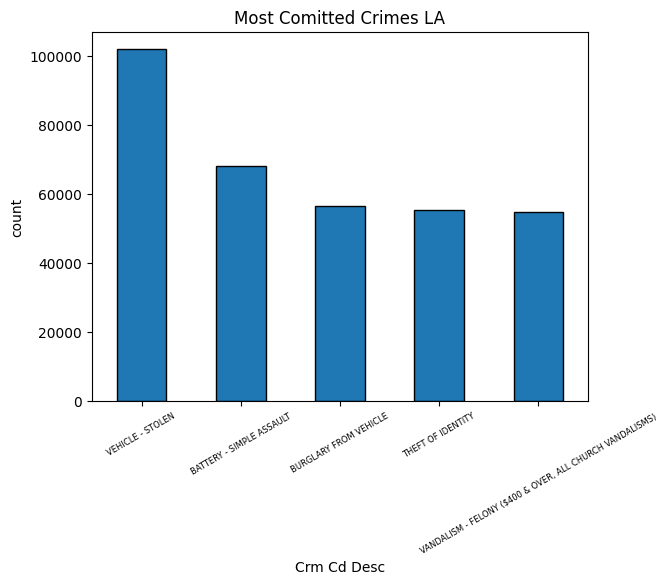

In [ ]:
import matplotlib.pyplot as plt

x = df['Crm Cd Desc'].value_counts().head(5)
plt.title('Most Comitted Crimes LA')
plt.xlabel('Crimes')
plt.ylabel('count')
x.plot(kind='bar', edgecolor='black')
plt.xticks(rotation=30, fontsize=6)
plt.show()

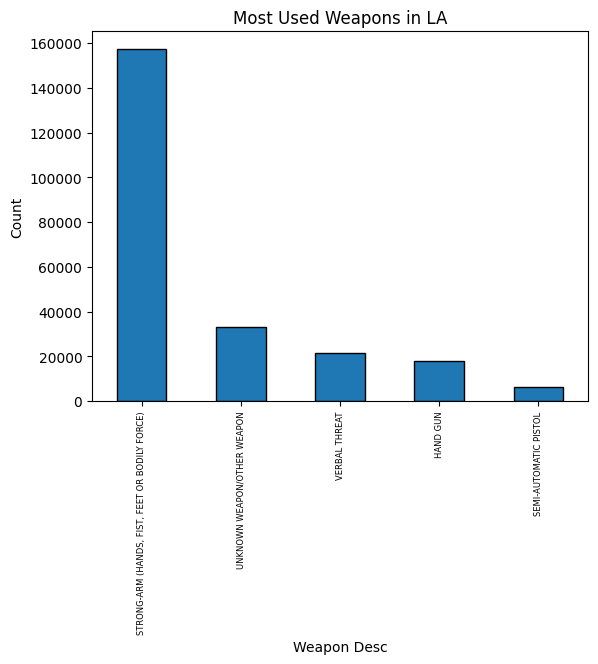

In [ ]:
x=df['Weapon Desc'].value_counts().head(5)
plt.title('Most Used Weapons in LA')
plt.xlabel('Weapons')
plt.ylabel('Count')
x.plot(kind='bar', edgecolor='black')
plt.xticks(rotation=90, fontsize=6)
plt.show()

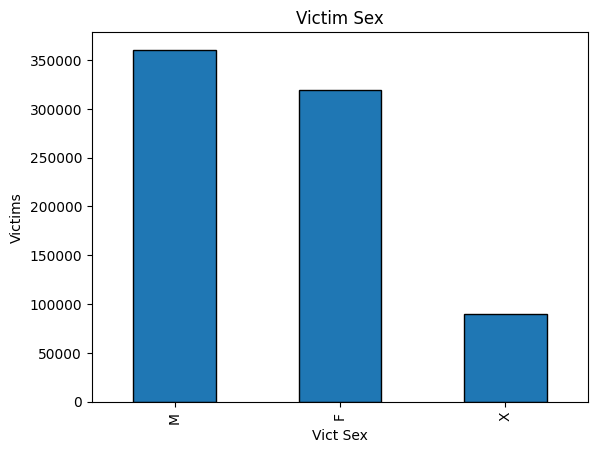

In [ ]:
x=df['Vict Sex'].value_counts().head(3)
plt.title('Victim Sex')
plt.xlabel('Sex')
plt.ylabel('Victims')
x.plot(kind='bar', edgecolor='black')
plt.show()

In [ ]:
df['DATE OCC']=df['DATE OCC'].apply(lambda x: x[6:10])

In [ ]:
df['DATE OCC'].value_counts().sort_index().values

array([199812, 114711, 235204, 232269, 116571], dtype=int64)

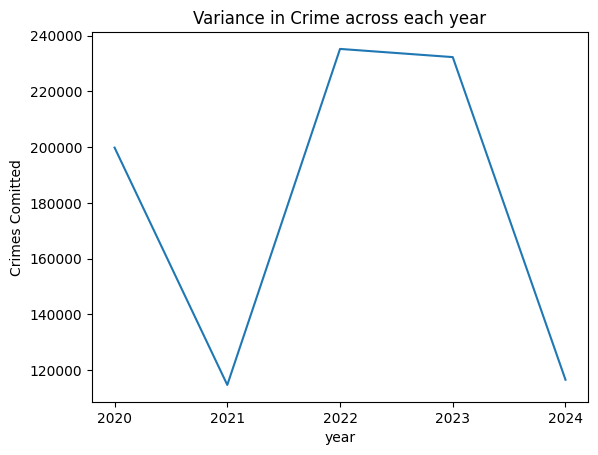

In [ ]:
x=df['DATE OCC'].value_counts().sort_index().index
y=df['DATE OCC'].value_counts().sort_index().values
plt.title('Variance in Crime across each year')
plt.xlabel('year')
plt.ylabel('Crimes Comitted')
plt.plot(x, y)
plt.show()

# Cleaning and Preprocessing for Training

In [ ]:
df.drop(['Status Desc', 'Vict Sex', 'DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'AREA NAME','Cross Street', 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd Desc', 'LAT', 'LON', 'Part 1-2', 'Mocodes', 'LOCATION', 'Premis Desc'], inplace=True, axis=1)

In [ ]:
df.dropna(inplace=True)

In [ ]:
mean_age=df['Vict Age'].mean().astype(int)

In [ ]:
df['Premis Cd']=df['Premis Cd'].astype(int)

In [ ]:
df['Vict Age']=df['Vict Age'].astype(float) ##changing age column from a discrete form to continous. so as not be considered as a label

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
l1=['Status', 'Vict Descent']

for i in l1:
  df[i]=le.fit_transform(df[i])

In [ ]:
df.head()

,AREA,Rpt Dist No,Crm Cd,Vict Age,Vict Descent,Premis Cd,Status
0,7,784,510,0.0,12,101,0
1,1,182,330,47.0,12,128,3
2,3,356,480,19.0,18,502,3
3,9,964,343,19.0,12,405,3
4,6,666,354,28.0,7,102,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 770597 entries, 0 to 984043
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AREA          770597 non-null  int64  
 1   Rpt Dist No   770597 non-null  int64  
 2   Crm Cd        770597 non-null  int64  
 3   Vict Age      770597 non-null  float64
 4   Vict Descent  770597 non-null  int32  
 5   Premis Cd     770597 non-null  int32  
 6   Status        770597 non-null  int32  
dtypes: float64(1), int32(3), int64(3)
memory usage: 38.2 MB


In [ ]:
x=df.drop('Status', axis=1)

In [ ]:
y=df['Status']

# Splitting the Data for testing and training

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rndm=RandomForestClassifier()

# Cross Validation for better results

In [ ]:
grid={'n_estimators': [100, 200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'criterion' :   ['gini', 'entropy', 'log_loss'],
    'class_weight' :['balanced', 'balanced_subsample'],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'bootstrap' :[True, False]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs_cv=RandomizedSearchCV(estimator=rndm, param_distributions=grid, cv=3, verbose=1)

In [ ]:
rs_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=1)

In [ ]:
print(rs_cv.best_params_)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'criterion': 'log_loss', 'class_weight': 'balanced', 'bootstrap': True}


# training the Model on the Dataset to predict the status of criminal

In [ ]:
rndm=RandomForestClassifier(n_estimators= 500, min_samples_split= 2, min_samples_leaf= 1, max_features= 'log2', criterion= 'log_loss', class_weight= 'balanced', bootstrap= True)
rndm.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_features='log2', n_estimators=500)

# Model Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

y_predict=rndm.predict(x_test)
accuracy_score(y_test, y_predict)

0.7659810537243706